<a target="_blank" href="https://colab.research.google.com/github/vnstock-hq/vnstock_ezchart/blob/main/docs/vnstock_ezchart_demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Cài đặt

In [ ]:
!pip install vnstock_ezchart

In [3]:
from vnstock_ezchart import *
ezchart = MPlot() # Khởi tạo đối tượng

In [ ]:
# !pip install -r requirements.txt # Cài đặt các gói phụ thuộc nếu việc tự động cài đặt không thành công

# Nạp dữ liệu

In [8]:
from vnstock import *
candle_df =  stock_historical_data(symbol='GMD', 
                            start_date="2019-01-01", 
                            end_date='2024-03-22', resolution='1D', type='stock', beautify=True, decor=False, source='DNSE')

candle_df['time'] = pd.to_datetime(candle_df['time'])
candle_df.set_index('time', inplace=True)

income_df = financial_report (symbol='SSI', report_type='IncomeStatement', frequency='Quarterly', periods=15, latest_year=None)
income_df = income_df.T
income_df.columns = income_df.iloc[0]
income_df = income_df[1:]
# convert all columns to numeric
income_df = income_df.apply(pd.to_numeric, errors='coerce')

## Tính năng

## Tiện ích

### Hướng dẫn tích hợp

Thư viện cung cấp sẵn tiện ích help cho phép truy xuất hướng dẫn sử dụng từ docstring đi kèm từng hàm một cách thuận tiện mà không phải chuyển đổi qua lại với trang tài liệu hoặc mở mã nguồn để xem.

In [14]:
ezchart.help('bar')


        Vẽ biểu đồ cột với các tùy chỉnh chi tiết.

        Tham số:
            - data (pd.DataFrame hoặc pd.Series): Dữ liệu đầu vào dạng DataFrame hoặc Series.
            - title (str): Tiêu đề của biểu đồ.
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - xlabel (str): Nhãn cho trục X.
            - ylabel (str): Nhãn cho trục Y.
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - grid (bool): Hiển thị lưới. Nhận True để hiện thị hoặc False để ẩn lưới.
            - data_labels (bool): Hiển thị nhãn dữ liệu trên biểu đồ.
           

### Các bảng màu tích hợp sẵn

`vnstock_ezchart` cung cấp sẵn bộ bảng màu hiện đại và đẹp mắt để sử dụng ngay khi cài đặt. Bạn cũng có thể tự tạo cho mình bảng màu ưa thích từ các dịch vụ như https://colorhunt.co hay https://colorpalettes.net, vv

In [18]:
Utils.brand_palettes.keys() # Xóa phần `.keys()` và chạy lệnh để xem chi tiết các màu có sẵn

dict_keys(['percentage', 'amount', 'category', 'trend', 'stock', 'flatui', 'vnstock', 'learn_anything', 'beach', 'forest'])

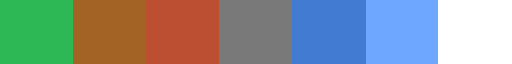

In [142]:
Utils.create_cmap('vnstock')

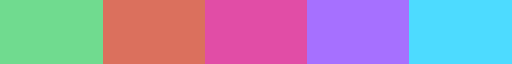

In [147]:
Utils.create_cmap('stock')

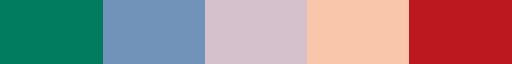

In [148]:
Utils.create_cmap('trend')

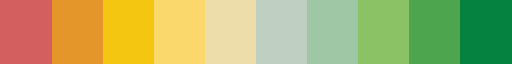

In [143]:
Utils.create_cmap('percentage')

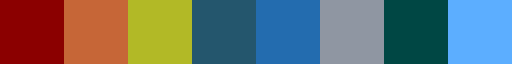

In [144]:
Utils.create_cmap('category')

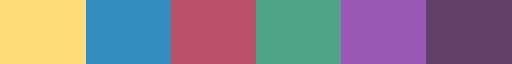

In [145]:
Utils.create_cmap('flatui')

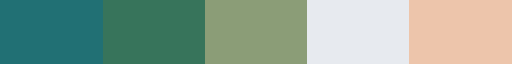

In [146]:
Utils.create_cmap('beach')

### Tải font chữ

In [151]:
Utils.download_font('Roboto')

## Biểu diễn dữ liệu

### Biểu đồ cột (bar)

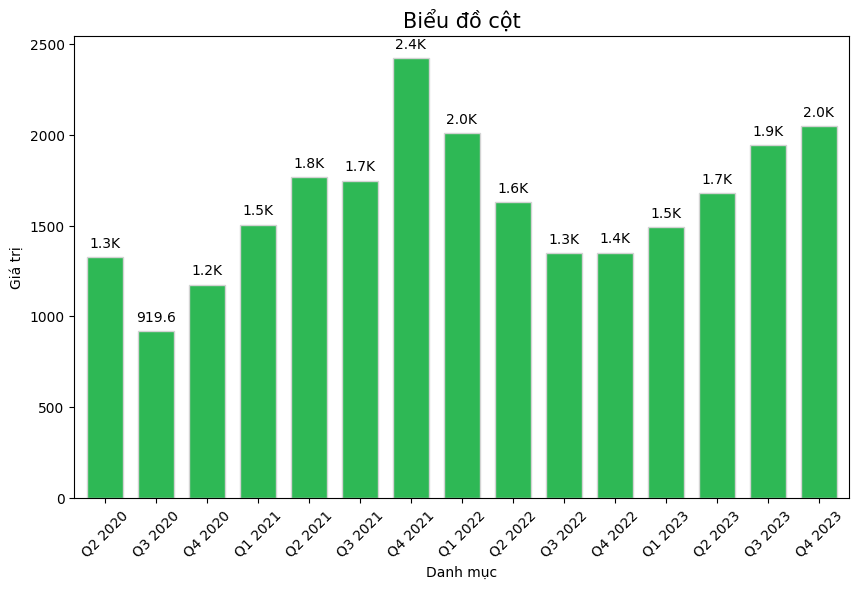

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Biểu đồ cột'}, xlabel='Danh mục', ylabel='Giá trị'>)

In [112]:
ezchart.bar(income_df['Doanh thu hoạt động'] / 1000_000_000, 
          color_palette='vnstock', palette_shuffle=False, 
          title='Biểu đồ cột', xlabel='Danh mục', ylabel='Giá trị', 
          grid=False, 
          data_labels=True,
          show_legend=False,
          legend_title='Chú thích',
          series_names=['Test'],
          figsize=(10, 6), 
          rot=45, 
          width=0.7,
          title_fontsize=15,
          label_fontsize=10,
          bar_edge_color='lightgrey'
          )

### Histogram

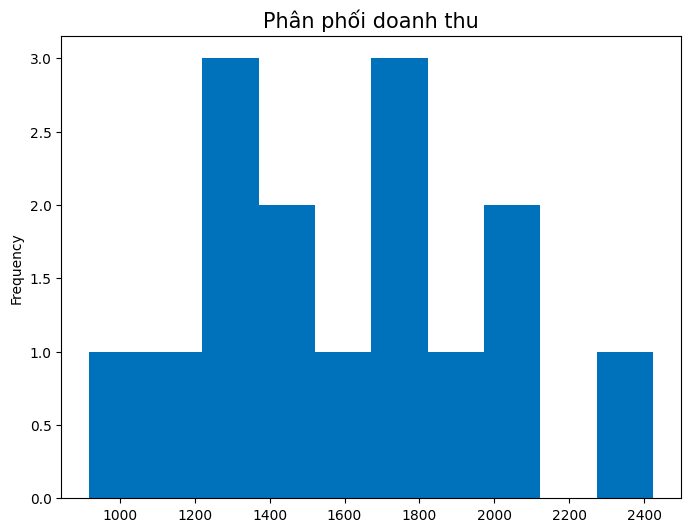

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Phân phối doanh thu'}, ylabel='Frequency'>)

In [23]:
ezchart.hist(income_df['Doanh thu hoạt động'] / 1000_000_000, 
           color_palette='category', 
           palette_shuffle=True, 
           title='Phân phối doanh thu', 
           grid=False, 
           figsize=(8, 6), 
           bins=10,
           title_fontsize=15)

### Pie chart (Biểu đồ tròn)

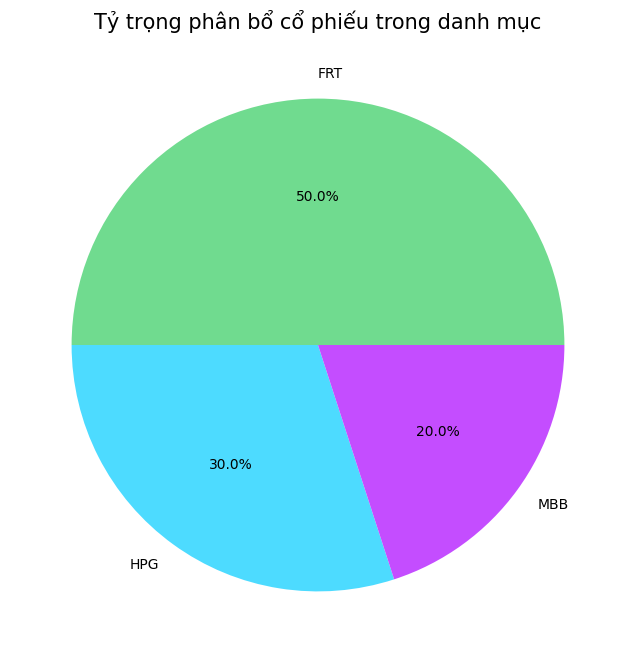

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Tỷ trọng phân bổ cổ phiếu trong danh mục'}>)

In [41]:
ezchart.pie(data=pd.Series([0.5, 0.3, 0.2]), 
          labels=pd.Series(['FRT', 'HPG', 'MBB']), 
          color_palette='stock', palette_shuffle=True,
          figsize=(8, 8), 
          title='Tỷ trọng phân bổ cổ phiếu trong danh mục',
          title_fontsize=15)

### Time Series

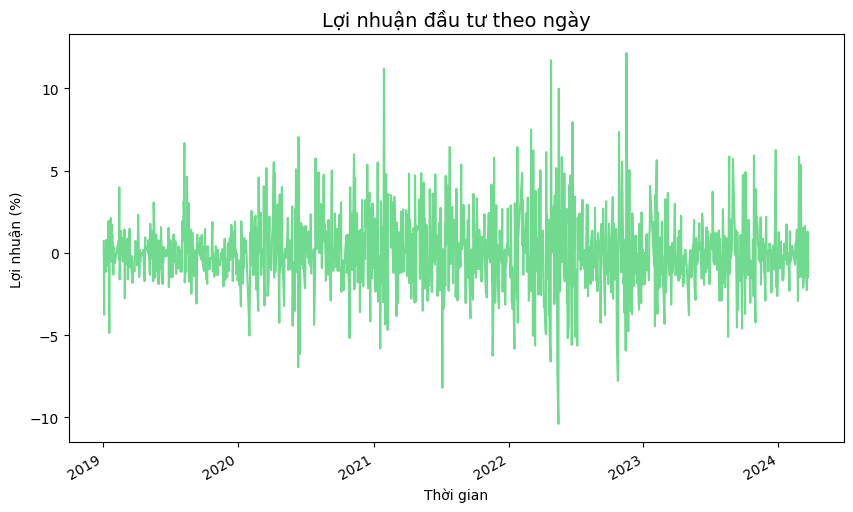

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Lợi nhuận đầu tư theo ngày'}, xlabel='Thời gian', ylabel='Lợi nhuận (%)'>)

In [42]:
candle_df['daily_return'] = (candle_df['close'] - candle_df['open']) / candle_df['open']

ezchart.timeseries(candle_df['daily_return'] * 100,
                 title='Lợi nhuận đầu tư theo ngày',
                 xlabel='Thời gian',
                 ylabel='Lợi nhuận (%)',
                 color_palette='stock', palette_shuffle=True,
                 figsize=(10,6),
                 title_fontsize=14)

## Heatmap

In [43]:
candle_df['month'] = candle_df.index.strftime('%m')
candle_df['year'] = candle_df.index.strftime('%Y')
return_stats = pd.pivot_table(candle_df, index='year', columns='month', values='daily_return', aggfunc='median')

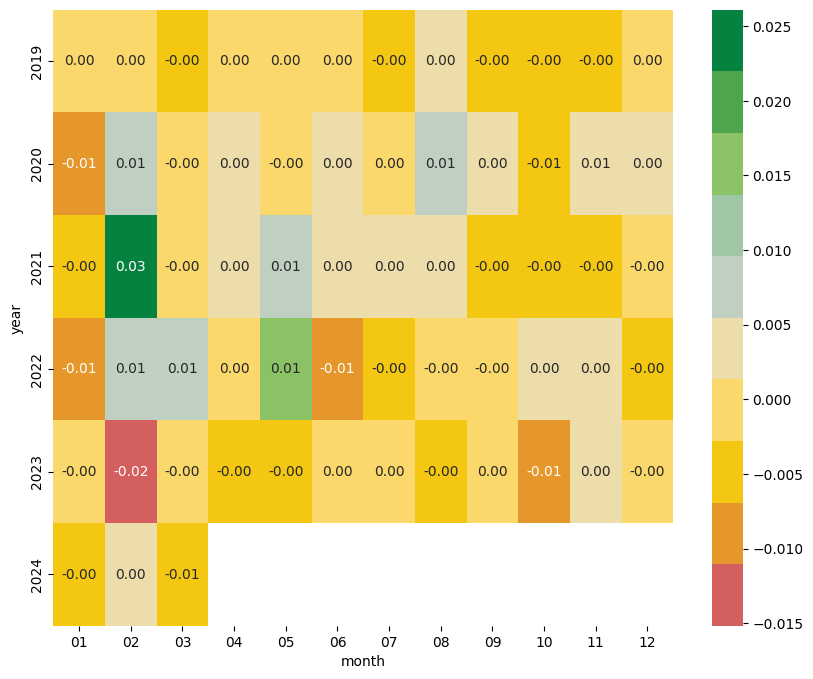

(<Figure size 1000x800 with 2 Axes>, <Axes: xlabel='month', ylabel='year'>)

In [47]:
color_map = ezchart.utils.create_cmap(color_palette='percentage', cmap_name='percentage') # tạo 1 bảng màu có tên vnstock

ezchart.heatmap(return_stats, 
              annot=True, 
              cmap=color_map, 
              fmt=".2f",
              figsize=(10,8),
              )

### Scatter Plot (biểu đồ phân tán)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


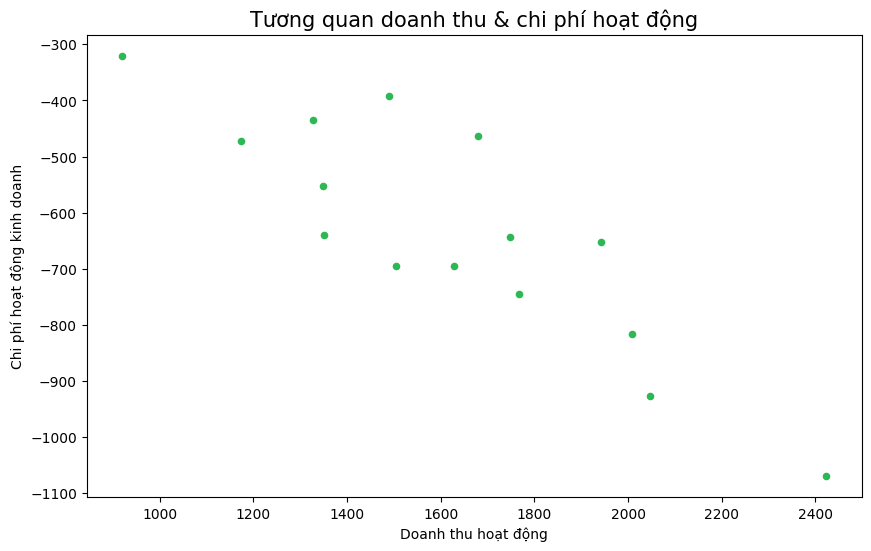

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Tương quan doanh thu & chi phí hoạt động'}, xlabel='Doanh thu hoạt động', ylabel='Chi phí hoạt động kinh doanh'>)

In [48]:
ezchart.scatter(data=income_df[['Doanh thu hoạt động', 'Chi phí hoạt động kinh doanh']] / 1000_000_000,
              x='Doanh thu hoạt động', 
              y='Chi phí hoạt động kinh doanh',
              title='Tương quan doanh thu & chi phí hoạt động',
              title_fontsize=15,
              figsize=(10,6))

### Treemap

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

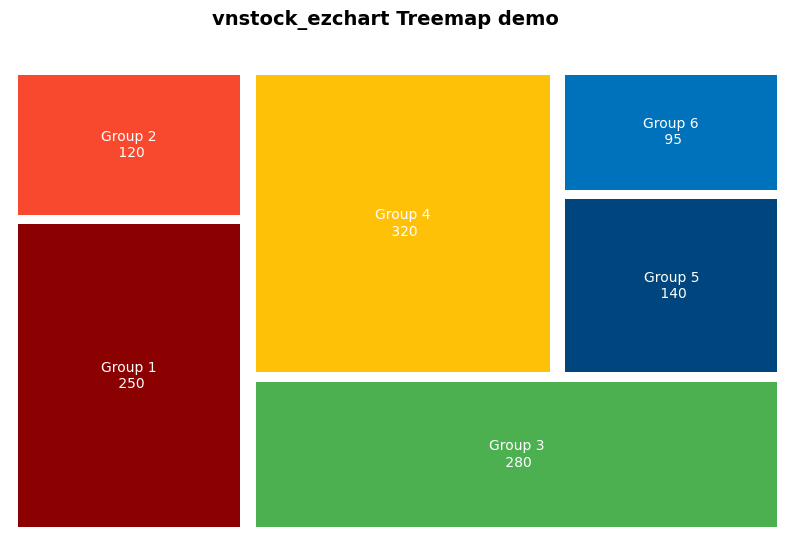

In [53]:
# Dữ liệu mẫu
values = [250, 120, 280, 320, 140, 95]
labels = ['Group 1\n 250', 'Group 2\n 120', 'Group 3\n 280',
          'Group 4\n 320', 'Group 5\n 140', 'Group 6\n 95']


ezchart.treemap(values=values, labels=labels, title='vnstock_ezchart Treemap demo', color_palette='category', palette_shuffle=True, figsize=(10,6))

### Boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


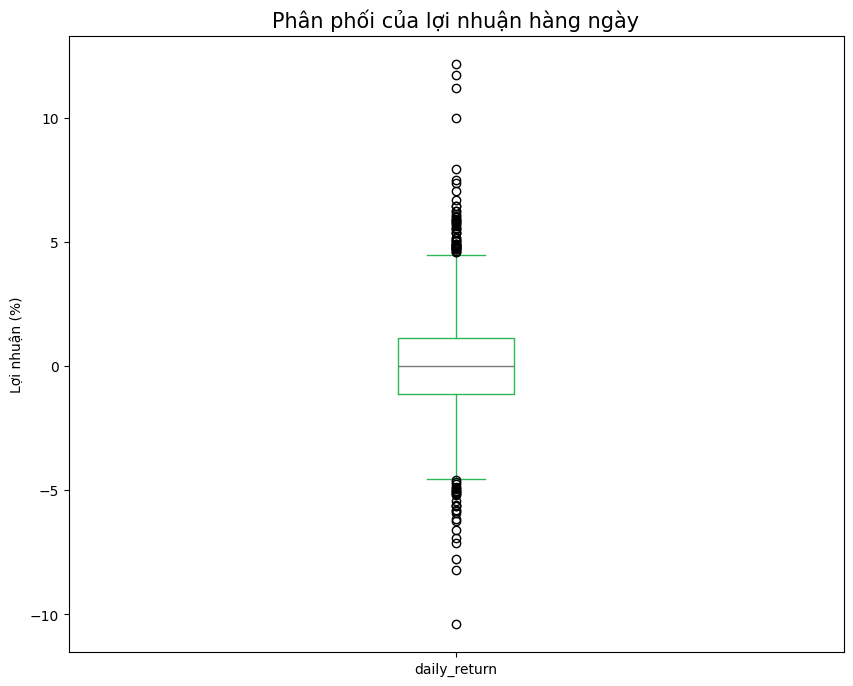

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'Phân phối của lợi nhuận hàng ngày'}, ylabel='Lợi nhuận (%)'>)

In [110]:
ezchart.boxplot(candle_df['daily_return'] * 100, 
title='Phân phối của lợi nhuận hàng ngày', 
figsize=(10,8), 
title_fontsize=15,
ylabel='Lợi nhuận (%)')

### Pair plot

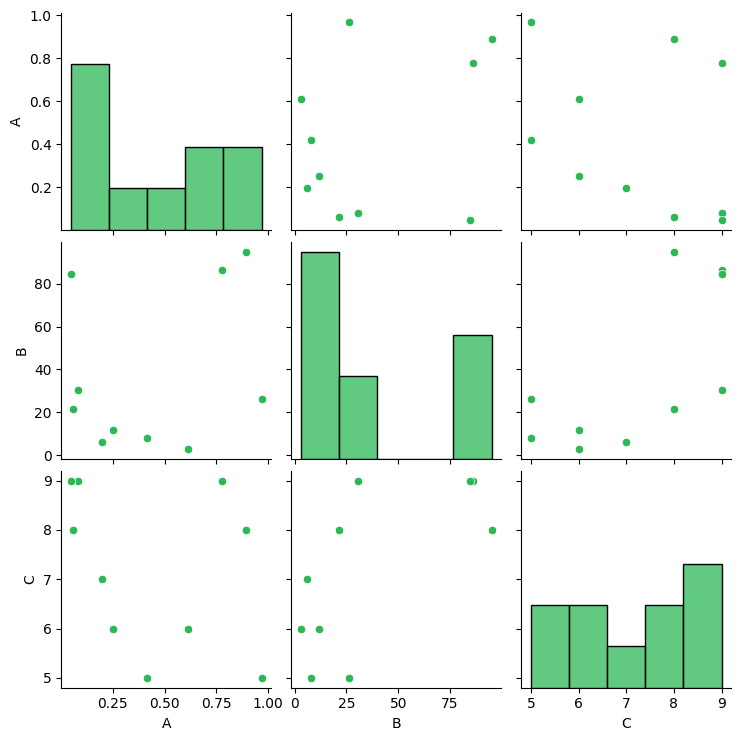

In [56]:
import numpy as np

data = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10) * 100,
    'C': np.random.randint(1, 10, 10)
}, index=pd.date_range('20230101', periods=10))

ezchart.pairplot(data)

### Word cloud

In [62]:
Utils.list_font() # Liệt kê danh sách font chữ hỗ trợ

0             DejaVu Serif
1          STIXSizeFourSym
2              STIXGeneral
3             DejaVu Serif
4         DejaVu Sans Mono
5             DejaVu Serif
6                    cmb10
7              DejaVu Sans
8           STIXSizeTwoSym
9              STIXGeneral
10        DejaVu Sans Mono
11             DejaVu Sans
12        DejaVu Sans Mono
13                  cmtt10
14          STIXNonUnicode
15                  cmss10
16          STIXNonUnicode
17          STIXSizeTwoSym
18     DejaVu Sans Display
19                   cmr10
20    DejaVu Serif Display
21             STIXGeneral
22          STIXSizeOneSym
23          STIXSizeOneSym
24                  cmsy10
25             DejaVu Sans
26        STIXSizeThreeSym
27          STIXNonUnicode
28        STIXSizeThreeSym
29            DejaVu Serif
30             DejaVu Sans
31         STIXSizeFiveSym
32          STIXNonUnicode
33        DejaVu Sans Mono
34         STIXSizeFourSym
35                  cmmi10
36                  cmex10
3

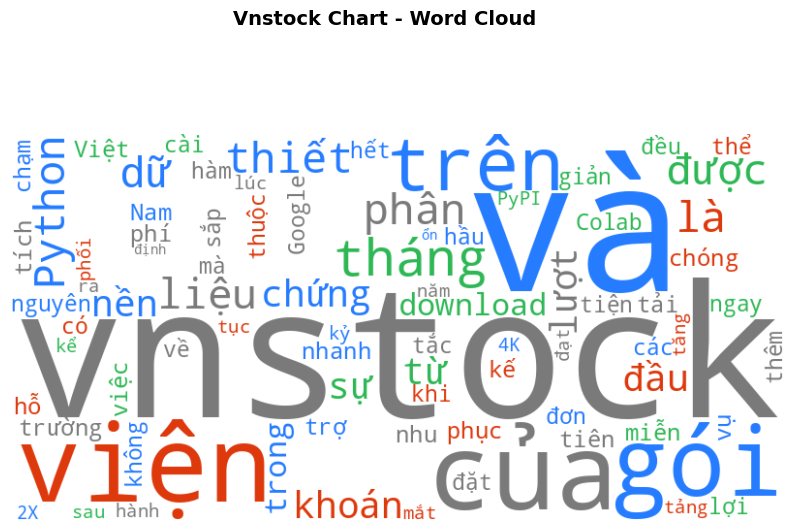

In [70]:
wordcloud_text = 'Vnstock Chart là thư viện hỗ trợ vẽ biểu đồ dữ liệu một cách dễ dàng và nhanh chóng với hầu hết các loại biểu đồ thông dụng chỉ với dữ liệu đầu vào và một vài tham số tùy chỉnh, hoàn toàn không cần biết nhiều về code.'
vnstock_intro = """
                vnstock là thư viện Python được thiết phục vụ nhu cầu phân tích dữ liệu thị trường chứng khoán Việt Nam, nền móng đầu tiên của thư viện bắt đầu từ việc hỗ trợ tải dữ liệu chứng khoán nhanh chóng, và miễn phí. Gói thư viện được thiết kế dựa trên nguyên tắc về sự đơn giản và tiện lợi, hầu hết các hàm đều có thể chạy ngay trên Google Colab khi cài đặt vnstock mà không yêu cầu thêm gói phụ thuộc.
                vnstock sắp chạm mốc 100K lượt download trong tháng 3/2024 trên nền tảng phân phối gói python - PyPI sau 2 năm ra mắt. Lượt download trong tháng 12/2023 đạt mốc kỷ lục 15.4K kể từ lúc phát hành và 2X so với tháng 11 và tiếp tục tăng trưởng ổn định. Đây là một dấu mốc đáng nhớ của vnstock nhờ sự đón nhận của bạn & cộng đồng!
                """
ezchart.wordcloud(vnstock_intro, title='Vnstock Chart - Word Cloud', color_palette='vnstock', palette_shuffle=True, fontname='DejaVu Sans', figsize=(10, 6))

### Table

In [99]:
bt_sample = {
    "Start": "2004-08-19 00:00:00",
    "End": "2013-03-01 00:00:00",
    "Duration": "3116 days 00:00:00",
    "Exposure Time [%]": 94.27,
    "Equity Final [$]": 68935.12,
    "Equity Peak [$]": 68991.22,
    "Return [%]": 589.35,
    "Buy & Hold Return [%]": 703.46,
    "Return (Ann.) [%]": 25.42,
    "Volatility (Ann.) [%]": 38.43,
    "Sharpe Ratio": 0.66,
    "Sortino Ratio": 1.30,
    "Calmar Ratio": 0.77,
    "Max. Drawdown [%]": -33.08,
    "Avg. Drawdown [%]": -5.58,
    "Max. Drawdown Duration": "688 days 00:00:00",
    "Avg. Drawdown Duration": "41 days 00:00:00",
    # "# Trades": 93,
    # "Win Rate [%]": 53.76,
    # "Best Trade [%]": 57.12,
    # "Worst Trade [%]": -16.63,
    # "Avg. Trade [%]": 1.96,
    # "Max. Trade Duration": "121 days 00:00:00",
    # "Avg. Trade Duration": "32 days 00:00:00",
    # "Profit Factor": 2.13,
    # "Expectancy [%]": 6.91,
    # "SQN": 1.78,
    # "_strategy": "SmaCross(n1=10, n2=20)"
}

bt_sample_df = pd.DataFrame([bt_sample])
bt_sample_df = bt_sample_df.T.reset_index().rename(columns={'index': 'Label', 0: 'Values'})
bt_sample_df

,Label,Values
0,Start,2004-08-19 00:00:00
1,End,2013-03-01 00:00:00
2,Duration,3116 days 00:00:00
3,Exposure Time [%],94.27
4,Equity Final [$],68935.12
5,Equity Peak [$],68991.22
6,Return [%],589.35
7,Buy & Hold Return [%],703.46
8,Return (Ann.) [%],25.42
9,Volatility (Ann.) [%],38.43


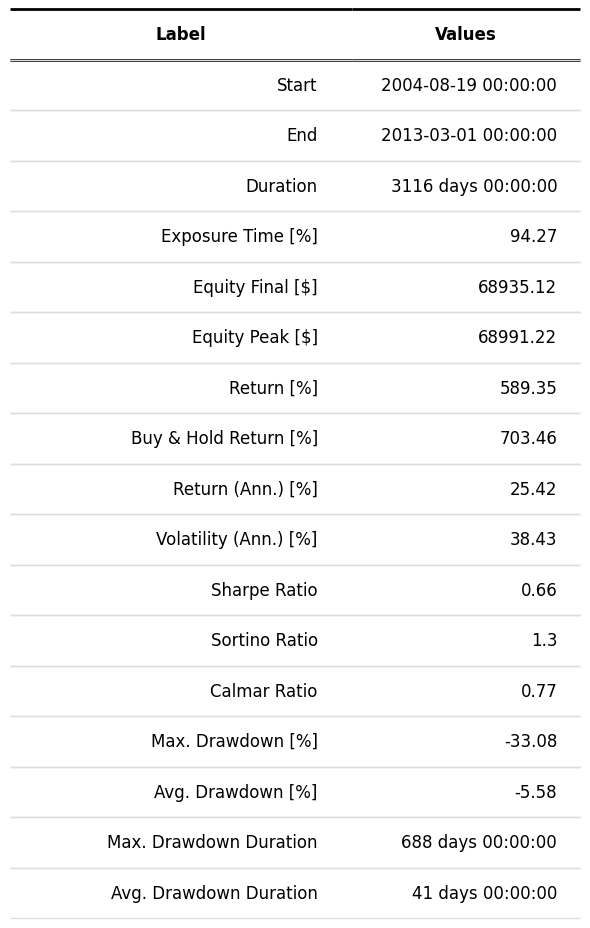

In [100]:
ezchart.table(bt_sample_df, 
            figsize=(6, 10), 
            # title="Bảng dữ liệu minh họa", 
            title_loc="center", header=True, 
            colWidths=[0.6, 0.4], 
            rowLoc="center", 
            colLoc="center", 
            edges="horizontal", 
            orient="horizontal", 
            show=True)

### Combo chart (Bar + Line)

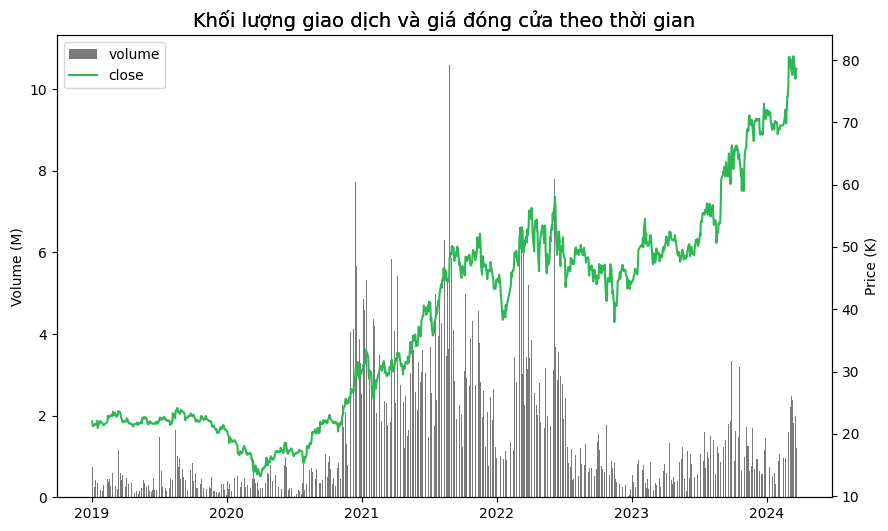

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Khối lượng giao dịch và giá đóng cửa theo thời gian'}, ylabel='Volume (M)'>,
 <Axes: title={'center': 'Khối lượng giao dịch và giá đóng cửa theo thời gian'}, ylabel='Price (K)'>)

In [141]:
ezchart.combo_chart(candle_df['volume'] / 1000_000, candle_df['close']/1000,
                  left_ylabel='Volume (M)', right_ylabel='Price (K)',
                  color_palette='vnstock', palette_shuffle=True,
                  show_legend=False,
                  figsize=(10, 6),
                  title='Khối lượng giao dịch và giá đóng cửa theo thời gian',
                  title_fontsize=14
                  )